In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
%matplotlib inline

In [2]:
def PCA(X):
    X_std = (X - np.mean(X,axis=0)) / np.std(X,axis=0)
    S = np.cov(X_std.T)
    Λ,V = np.linalg.eigh(S)
    Y = X_std.dot(V) / np.sqrt(np.abs(Λ))
    return Y, Λ, V

In [3]:
def reduceDimensionality(X, Λ, V, k):
    Y = (X * np.sqrt(np.abs(Λ)))[:,-k:].dot(V.T[-k:,:])
    return Y

In [4]:
def restoreData(Y, Λ, V, X, k):
    Z_std = reduceDimensionality(Y, Λ, V, k)
    Z = Z_std * X.std(axis=0) + X.mean(axis=0)
    return Z

In [15]:
def getEigenvector(v, λ,Y,X, index):
    Z = ((v * np.sqrt(np.abs(λ))).dot(Y[index,:]) * v) * np.std(X[:,index]) + np.mean(X[:,index])
    showVector(Z)
    return Z

In [6]:
def showImage(index, imageSet):
    im = imageSet[index,:]
    plt.figure(figsize=(10,4))
    plt.grid(False)
    plt.imshow(im.reshape(60,82).T, cmap = 'gray')

In [7]:
def showVector(im):
    plt.figure(figsize=(10,4))
    plt.grid(False)
    plt.imshow(im.reshape(60,82).T, cmap = 'gray')

In [8]:
import scipy.io
X = scipy.io.loadmat('Lista07Dane/ReducedImagesForTraining.mat')['images'].T

In [9]:
X.shape

(250, 4920)

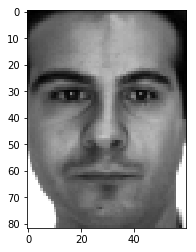

In [10]:
showImage(0, X)

In [11]:
Y, Λ, V = PCA(X)

In [12]:
Z100 = restoreData(Y, Λ,V,X, 1)

In [13]:
err = np.sum((Z100 - X)**2,axis=1)
np.sum(err)/X.shape[0]

4905044.6012241086

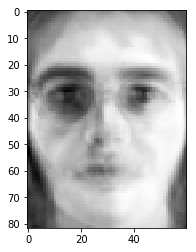

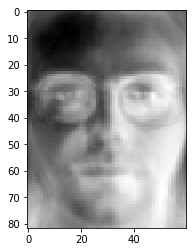

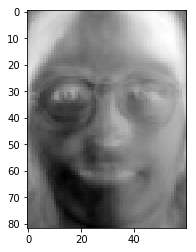

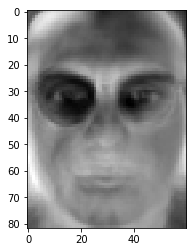

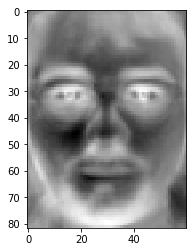

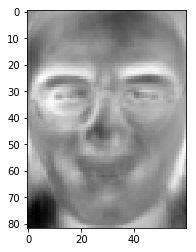

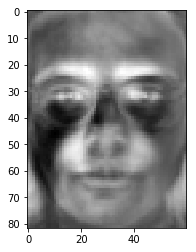

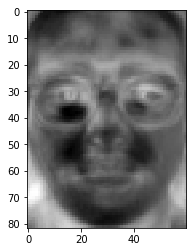

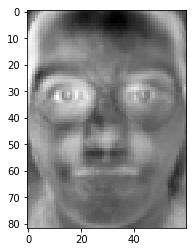

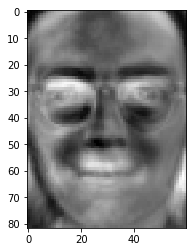

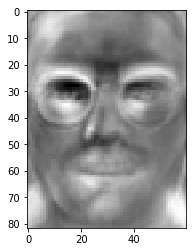

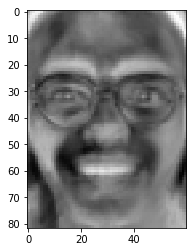

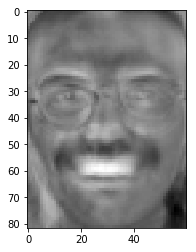

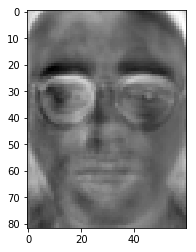

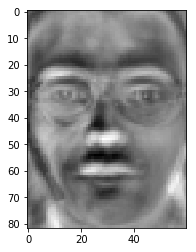

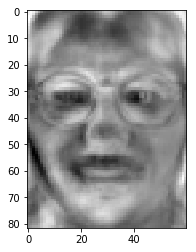

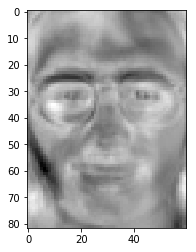

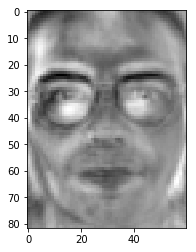

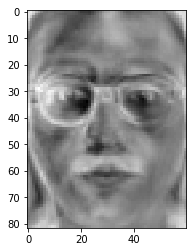

In [17]:
for i in range(1,20):
    v = getEigenvector(V[:,-i], Λ[-i], Y, X, 100)